In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [ ]:
#1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:
#Crear un data frame de pandas con los siguientes datos:



# Crear un DataFrame de ejemplo con nombres y alturas
data = {
    'Entreamiento':[0,1,2,3,4,"m"],
    'Y':[0,1,2,3,4,5],
    'X':[0,1,2,3,4,5]
}

df = pd.DataFrame(data)
df



,Entreamiento,Y,X
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,m,5,5


In [ ]:
#2. Crear una función para calcular  la función de coste

def cost_function(X, Y, theta):
    m = len(Y)  # número de ejemplos
    predi = theta[0] + theta[1] * X
    cost = (1 / (2 * m)) * np.sum((predi - Y) ** 2)  # La función de coste
    return cost

Text(0, 0.5, 'Función de coste')

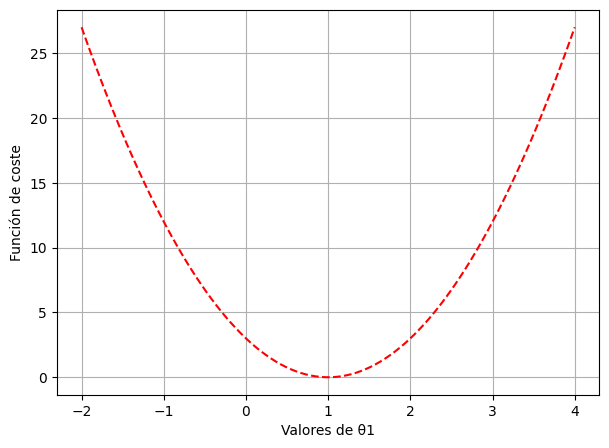

In [ ]:
#3. Asumiendo que  θ0=0 , represente gráficamente la función de coste para diferentes valores de  θ1 .
# Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.
data = {
    'Entreamiento':[0,1,2,3,4,"m"],
    'Y':[0,1,2,3,4,5],
    'X':[0,1,2,3,4,5]
}

df = pd.DataFrame(data)
df
def cost_function(X, Y, theta1):
    m = len(Y)
    predi = theta1 * X  #        La misma función pero asumiendo que θ0=0
    cost = (1 / (2 * m)) * np.sum((predi - Y) ** 2)  # MSE
    return cost


theta1_val=np.linspace(-2,4,100)

val_costes=[cost_function(X, Y, theta1) for theta1 in theta1_val]

fig,ax=plt.subplots(1,1,figsize=(7,5))

ax.plot(theta1_val,val_costes,'--r')
ax.grid(True)
ax.set_xlabel("Valores de θ1")
ax.set_ylabel("Función de coste")




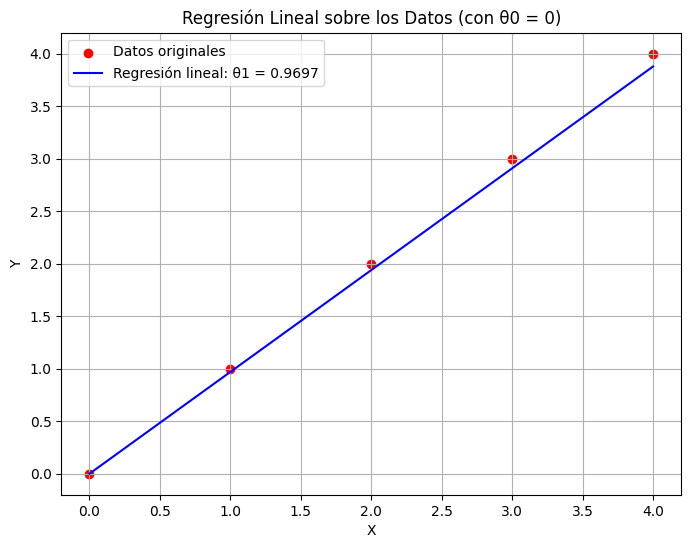

In [ ]:
# Encontramos el valor mínimo de la función de coste su correspondente θ1
min_cost_index = np.argmin(val_costes)
optimal_theta1 = theta1_val[min_cost_index]
min_cost = val_costes[min_cost_index]

# Mostrar el valor óptimo de θ1 y el mínimo coste
optimal_theta1, min_cost


plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='red', label='Datos originales')  #Vaores origininales en puntos rojos


Y_predicho = optimal_theta1 * X  # Predicción


plt.plot(X, Y_predicho, color='blue', label=f'Regresión lineal: θ1 = {optimal_theta1:.4f}')
plt.title('Regresión Lineal (con θ0 = 0)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
 #Todo esto bajo la presmisa inicial de que  θ0=0

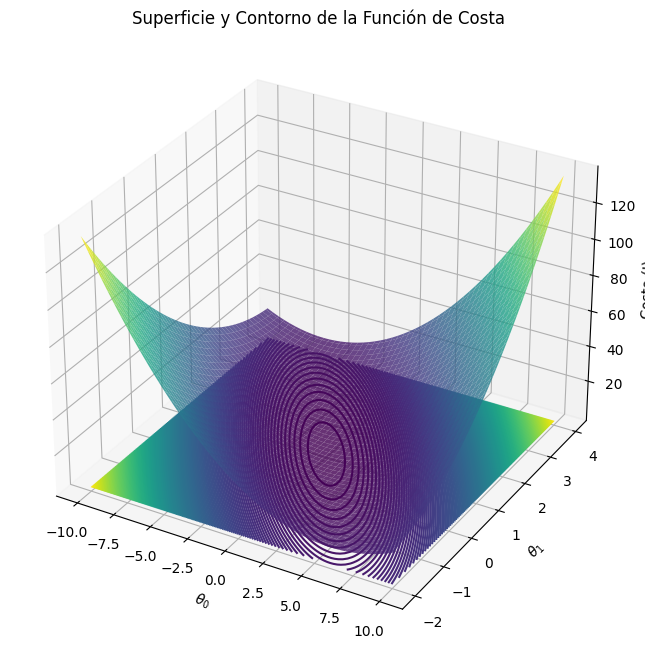

In [ ]:
#4.Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

data = {
    'Entreamiento':[0,1,2,3,4,"m"],
    'Y':[0,1,2,3,4,5],
    'X':[0,1,2,3,4,5]
}

df = pd.DataFrame(data)
df

# Define rangos de valores para θ0 y θ1
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-2, 4, 100)

# Toca hacer la malla para evaluar todos los pares de θ0 y θ1
t0, t1 = np.meshgrid(theta0_values, theta1_values)

# ISe inicializa J
J = np.zeros(t0.shape)


m = len(Y)  # número de ejemplos
for i in range(t0.shape[0]):
    for j in range(t0.shape[1]):
        predictions = t0[i, j] + t1[i, j] * X  # Funcion de coste para cadar par de   θ0 y θ1
        J[i, j] = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)

#G´rafico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de la superficie
ax.plot_surface(t0, t1, J, cmap='viridis', alpha=0.8)

# Contorno de la superficie
ax.contour(t0, t1, J, 200, linestyles="solid", offset=-0.5)

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("Coste (J)")

plt.title("Superficie y Contorno de la Función de Costa")
plt.show()


In [ ]:
# 5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

**CASO 1D**

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x_i - y_i \right)^2$

**CASO 2D**

$J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} - y_i \right)^2
$


In [ ]:
# 6.Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función,
#determine el mínimo con una error epsilon de 1E-4, pruebe su algoritmo para  f(x)=(x−4)^2  y al menos 3 valores de  α

def funcion(x):    # La funcion
  return (x-4)**2


def deriv(x):   # Su derivada
  return 2*(x-4)


def grad_des(α,x_ini,epsilon=1e-4,iter=1000):   #Definimos la funcion gradiente
  x=x_ini


  for i in range ( iter):
    grad=deriv(x)
    x_n=x-α*grad   #Actualizamos el x

    if abs(x_n-x)<epsilon:   #Verificamos la condicion del epsilon
      break

    x_n=x

  return x,i

#Tonces probemos

alpha=[0.1,0.01,0.001]

x_ini=np.random.rand()*10

epsilon=1e-4

for α in alpha:
   x_min, iters = grad_des(α, x_ini, epsilon)
   print(f"Alpha: {alpha}, x_min: {x_min}, iteraciones: {iters}")







Alpha: [0.1, 0.01, 0.001], x_min: 8.550817803829226, iteraciones: 999
Alpha: [0.1, 0.01, 0.001], x_min: 8.550817803829226, iteraciones: 999
Alpha: [0.1, 0.01, 0.001], x_min: 8.550817803829226, iteraciones: 999


Mínimo encontrado en x = 0.6116676871538294, y = -0.3947041059490033 en 9999 iteraciones


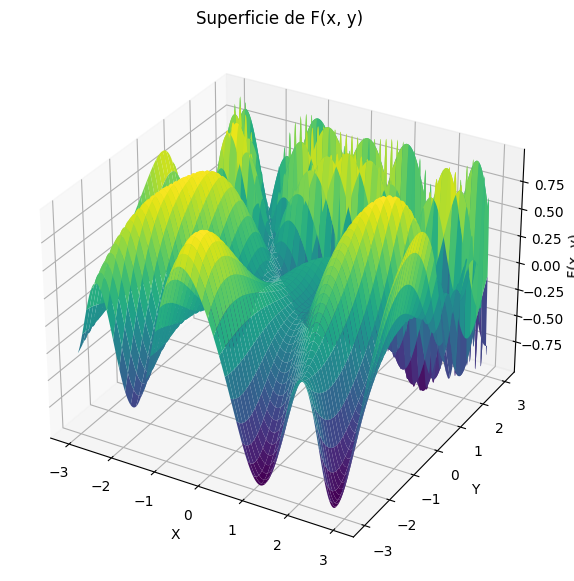

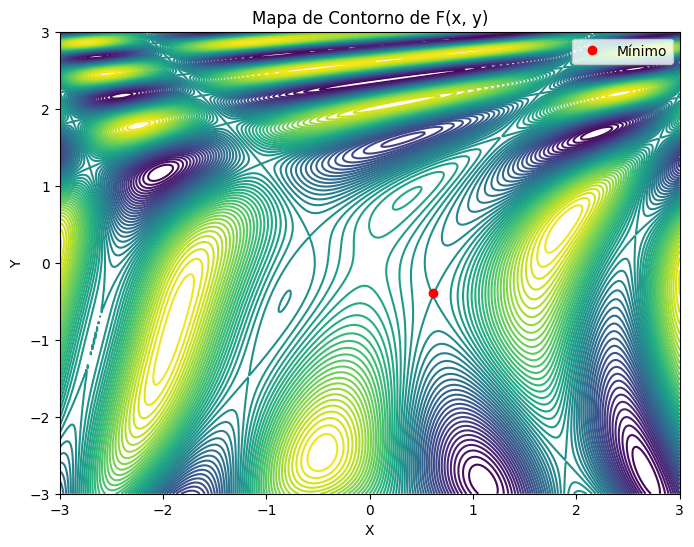

In [ ]:
#7.Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente



# La funcion
def F(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Derivadas parciales
def dF_dx(x, y):  #Con respecto a x
    return np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) * x - \
           2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))

def dF_dy(x, y):  # Con respecto a y
    return -0.5 * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) * y - \
           np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y)) * np.exp(y)

# Gradiente
def gradient_descent_2d(alpha, x_init, y_init, epsilon=1e-6, max_iters=10000):  #Añadimos el y inicial en este caso y modificams el epsilon
    x, y = x_init, y_init
    for i in range(max_iters):
        grad_x = dF_dx(x, y)
        grad_y = dF_dy(x, y)

        x_new = x - alpha * grad_x
        y_new = y - alpha * grad_y


        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < epsilon:  # La condicion de convergencia dek epsilon
            break
        x, y = x_new, y_new

    return x, y, i
#LOs parametros
alpha = 0.01
x_init, y_init = 1.0, 1.0

#Ejecutamos la funcion
x_min, y_min, iterations = gradient_descent_2d(alpha, x_init, y_init)
print(f"Mínimo encontrado en x = {x_min}, y = {y_min} en {iterations} iteraciones")

# Toca graficar eso
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = F(X, Y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x, y)')
ax.set_title('Superficie de F(x, y)')
plt.show()
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_min, y_min, 'ro', label="Mínimo")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapa de Contorno ')
plt.legend()
plt.show()


Pendiente (m): 0.19499753963675595
Intersección (b): 0.2119571100852096


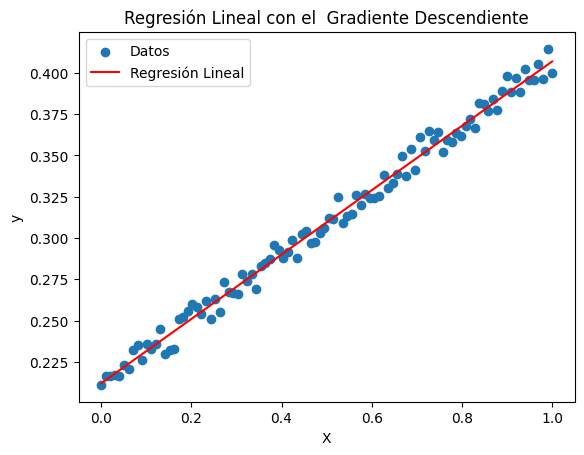

In [ ]:
#8. Empleando los siguientes datos :

np.random.seed(0)
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

#y las herramientas desarrolladas en los apartados anteriores, construya un algorítmo que permita determinar una regresión lineal.

#Parametross incializados
m = 0.0   # Los parametros de la recta
b = 0.0
aprendi = 0.1  #Aprendizaje
itera = 1000
n = len(y)

# Gradiente Descendente
for _ in range(itera):
    # Predicción
    y_pred = m * X + b

    # Función de coste , la tipica en 1d
    cost = (2/n) * np.sum((y - y_pred)**2)

    # LOs gradientes
    gradient_m = (-2/n) * np.sum(X * (y - y_pred))
    gradient_b = (-2/n) * np.sum(y - y_pred)

    # Se actualiza el intercepto y la pendiente
    m -= aprendi * gradient_m
    b -= aprendi * gradient_b


print(f"Pendiente (m): {m}")
print(f"Intersección (b): {b}")
plt.scatter(X, y, label='Datos')
plt.plot(X, m * X + b, color='red', label='Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con el  Gradiente Descendiente')
plt.legend()
plt.show()




Pendiente (m) de sklearn: 0.19499762627661113
Intersección (b) de sklearn: 0.21195706365194478


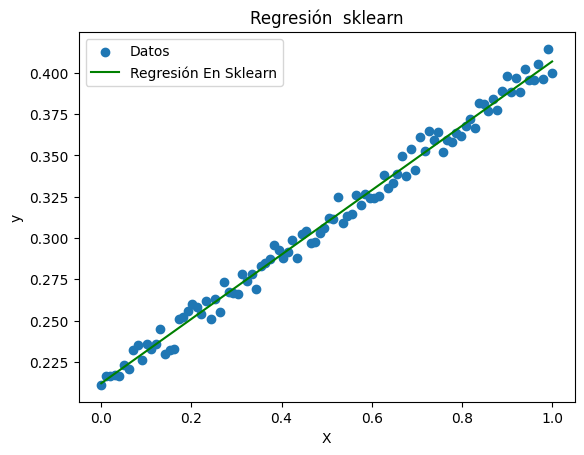

Pues vemos que los resultados son bastante similares en los parametros, asi decimos que la regresión usando gradiante descendiente es correcta


In [ ]:
# 9.Compare su resultado empleando la libreria linearRegresion() de sklearn.


      # Generaramos datos
np.random.seed(0)  # Para reproducibilidad
X = np.linspace(0, 1, 100).reshape(-1, 1)  # Cambiar la forma de X para sklearn
y = 0.2 + 0.2 * X.flatten() + 0.02 * np.random.random(100)


model = LinearRegression()    #Esto es Sklearn
model.fit(X, y)

# Obtener parámetros
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_


print(f"Pendiente (m) de sklearn: {m_sklearn}")   #La pendiente y el intercepto
print(f"Intersección (b) de sklearn: {b_sklearn}")

#Ploteo
plt.scatter(X, y, label='Datos')
plt.plot(X, model.predict(X), color='green', label='Regresión En Sklearn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión  sklearn')
plt.legend()
plt.show()

print("Pues vemos que los resultados son bastante similares en los parametros, asi decimos que la regresión usando gradiante descendiente es correcta")